# Kathmandu Air Quality Data Analysis

This notebook analyzes air quality data collected from OpenAQ for Kathmandu, Nepal.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)

## 1. Load Raw Data

In [8]:
raw_df = pd.read_csv('data/raw/raw_pollutant_data.csv')

print(f"Total records: {len(raw_df):,}")
print(f"Columns: {len(raw_df.columns)}")
print(f"\nShape: {raw_df.shape}")

raw_df.head()

Total records: 156,378
Columns: 22

Shape: (156378, 22)


,value,parameter,coordinates,summary,location_name,flagInfo.hasFlags,period.label,period.interval,period.datetimeFrom.utc,period.datetimeFrom.local,...,coverage.expectedCount,coverage.expectedInterval,coverage.observedCount,coverage.observedInterval,coverage.percentComplete,coverage.percentCoverage,coverage.datetimeFrom.utc,coverage.datetimeFrom.local,coverage.datetimeTo.utc,coverage.datetimeTo.local
0,0.004,o3,NaN,NaN,Embassy Kathmandu,False,raw,01:00:00,2017-03-02T22:15:00Z,2017-03-03T04:00:00+05:45,...,1,01:00:00,1,01:00:00,100.0,100.0,2017-03-02T22:15:00Z,2017-03-03T04:00:00+05:45,2017-03-02T23:15:00Z,2017-03-03T05:00:00+05:45
1,0.004,o3,NaN,NaN,Embassy Kathmandu,False,raw,01:00:00,2017-03-02T23:15:00Z,2017-03-03T05:00:00+05:45,...,1,01:00:00,1,01:00:00,100.0,100.0,2017-03-02T23:15:00Z,2017-03-03T05:00:00+05:45,2017-03-03T00:15:00Z,2017-03-03T06:00:00+05:45
2,0.003,o3,NaN,NaN,Embassy Kathmandu,False,raw,01:00:00,2017-03-03T00:15:00Z,2017-03-03T06:00:00+05:45,...,1,01:00:00,1,01:00:00,100.0,100.0,2017-03-03T00:15:00Z,2017-03-03T06:00:00+05:45,2017-03-03T01:15:00Z,2017-03-03T07:00:00+05:45
3,0.005,o3,NaN,NaN,Embassy Kathmandu,False,raw,01:00:00,2017-03-03T01:15:00Z,2017-03-03T07:00:00+05:45,...,1,01:00:00,1,01:00:00,100.0,100.0,2017-03-03T01:15:00Z,2017-03-03T07:00:00+05:45,2017-03-03T02:15:00Z,2017-03-03T08:00:00+05:45
4,0.009,o3,NaN,NaN,Embassy Kathmandu,False,raw,01:00:00,2017-03-03T02:15:00Z,2017-03-03T08:00:00+05:45,...,1,01:00:00,1,01:00:00,100.0,100.0,2017-03-03T02:15:00Z,2017-03-03T08:00:00+05:45,2017-03-03T03:15:00Z,2017-03-03T09:00:00+05:45


## 2. Data Overview

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156378 entries, 0 to 156377
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   value                        156378 non-null  float64
 1   parameter                    156378 non-null  object 
 2   coordinates                  0 non-null       float64
 3   summary                      0 non-null       float64
 4   location_name                156378 non-null  object 
 5   flagInfo.hasFlags            156378 non-null  bool   
 6   period.label                 156378 non-null  object 
 7   period.interval              156378 non-null  object 
 8   period.datetimeFrom.utc      156378 non-null  object 
 9   period.datetimeFrom.local    156378 non-null  object 
 10  period.datetimeTo.utc        156378 non-null  object 
 11  period.datetimeTo.local      156378 non-null  object 
 12  coverage.expectedCount       156378 non-null  int64  
 13 

In [10]:
print("Available Parameters:")
print(raw_df['parameter'].value_counts())

print("\nUnique Locations:")
print(raw_df['location_name'].nunique())

Available Parameters:
parameter
pm25    126042
o3       20000
pm10     10336
Name: count, dtype: int64

Unique Locations:
51


## 3. Process Data to Time Series Format

In [11]:
datetime_cols = [col for col in raw_df.columns if 'datetime' in col.lower() or 'date' in col.lower()]
print(f"DateTime columns: {datetime_cols}")

datetime_col = datetime_cols[0] if datetime_cols else None

if datetime_col:
    df_clean = raw_df[[datetime_col, 'parameter', 'value', 'location_name']].copy()
    df_clean.rename(columns={datetime_col: 'datetime'}, inplace=True)
    df_clean['datetime'] = pd.to_datetime(df_clean['datetime'])
    df_clean = df_clean.dropna()
    
    print(f"\nCleaned data shape: {df_clean.shape}")
    print(f"Date range: {df_clean['datetime'].min()} to {df_clean['datetime'].max()}")
    
    df_clean.head(10)

DateTime columns: ['period.datetimeFrom.utc', 'period.datetimeFrom.local', 'period.datetimeTo.utc', 'period.datetimeTo.local', 'coverage.datetimeFrom.utc', 'coverage.datetimeFrom.local', 'coverage.datetimeTo.utc', 'coverage.datetimeTo.local']

Cleaned data shape: (156378, 4)
Date range: 2017-03-02 22:15:00+00:00 to 2026-02-23 21:00:00+00:00


In [ ]:
print("Before cleaning:")
print(f"Total rows: {len(df_clean):,}")

df_clean = df_clean[df_clean['value'] > 0].copy()

print("\nAfter removing negative/zero values:")
print(f"Total rows: {len(df_clean):,}")
print(f"\nValue range: {df_clean['value'].min():.2f} to {df_clean['value'].max():.2f}")

## 3.1. Clean Invalid Values

Remove negative values and error codes (like -999).

## 4. Summary Statistics

In [22]:
for param in df_clean['parameter'].unique():
    param_data = df_clean[df_clean['parameter'] == param]['value']
    print(f"\n{param.upper()} Statistics:")
    print(param_data.describe())


O3 Statistics:
count    20000.000000
mean        -0.059877
std          0.286022
min         -0.999000
25%          0.005000
50%          0.018000
75%          0.040000
max          0.116000
Name: value, dtype: float64

PM25 Statistics:
count    126042.000000
mean         49.769264
std         138.705004
min        -999.000000
25%          35.404428
50%          54.865292
75%          89.000000
max         985.000000
Name: value, dtype: float64

PM10 Statistics:
count    10336.000000
mean        57.970497
std         40.007923
min          0.872619
25%         27.264631
50%         49.791170
75%         77.482962
max        297.301092
Name: value, dtype: float64


## 5. Create Pivot Table (Wide Format)

In [13]:
df_pivot = df_clean.pivot_table(
    index='datetime',
    columns='parameter',
    values='value',
    aggfunc='mean'
)

df_pivot = df_pivot.sort_index()

print(f"Pivoted data shape: {df_pivot.shape}")
print(f"Parameters: {df_pivot.columns.tolist()}")

df_pivot.head(10)

Pivoted data shape: (26525, 3)
Parameters: ['o3', 'pm10', 'pm25']


parameter,o3,pm10,pm25
datetime,,,
2017-03-02 22:15:00+00:00,0.0030,NaN,80.30
2017-03-02 23:15:00+00:00,0.0030,NaN,103.90
2017-03-03 00:15:00+00:00,0.0025,NaN,115.40
2017-03-03 01:15:00+00:00,0.0040,NaN,125.20
2017-03-03 02:15:00+00:00,0.0070,NaN,193.60
2017-03-03 03:15:00+00:00,0.0320,NaN,167.80
2017-03-03 04:15:00+00:00,0.0630,NaN,224.15
2017-03-03 05:15:00+00:00,0.0660,NaN,157.25
2017-03-03 06:15:00+00:00,0.0550,NaN,102.60


## 6. Visualizations

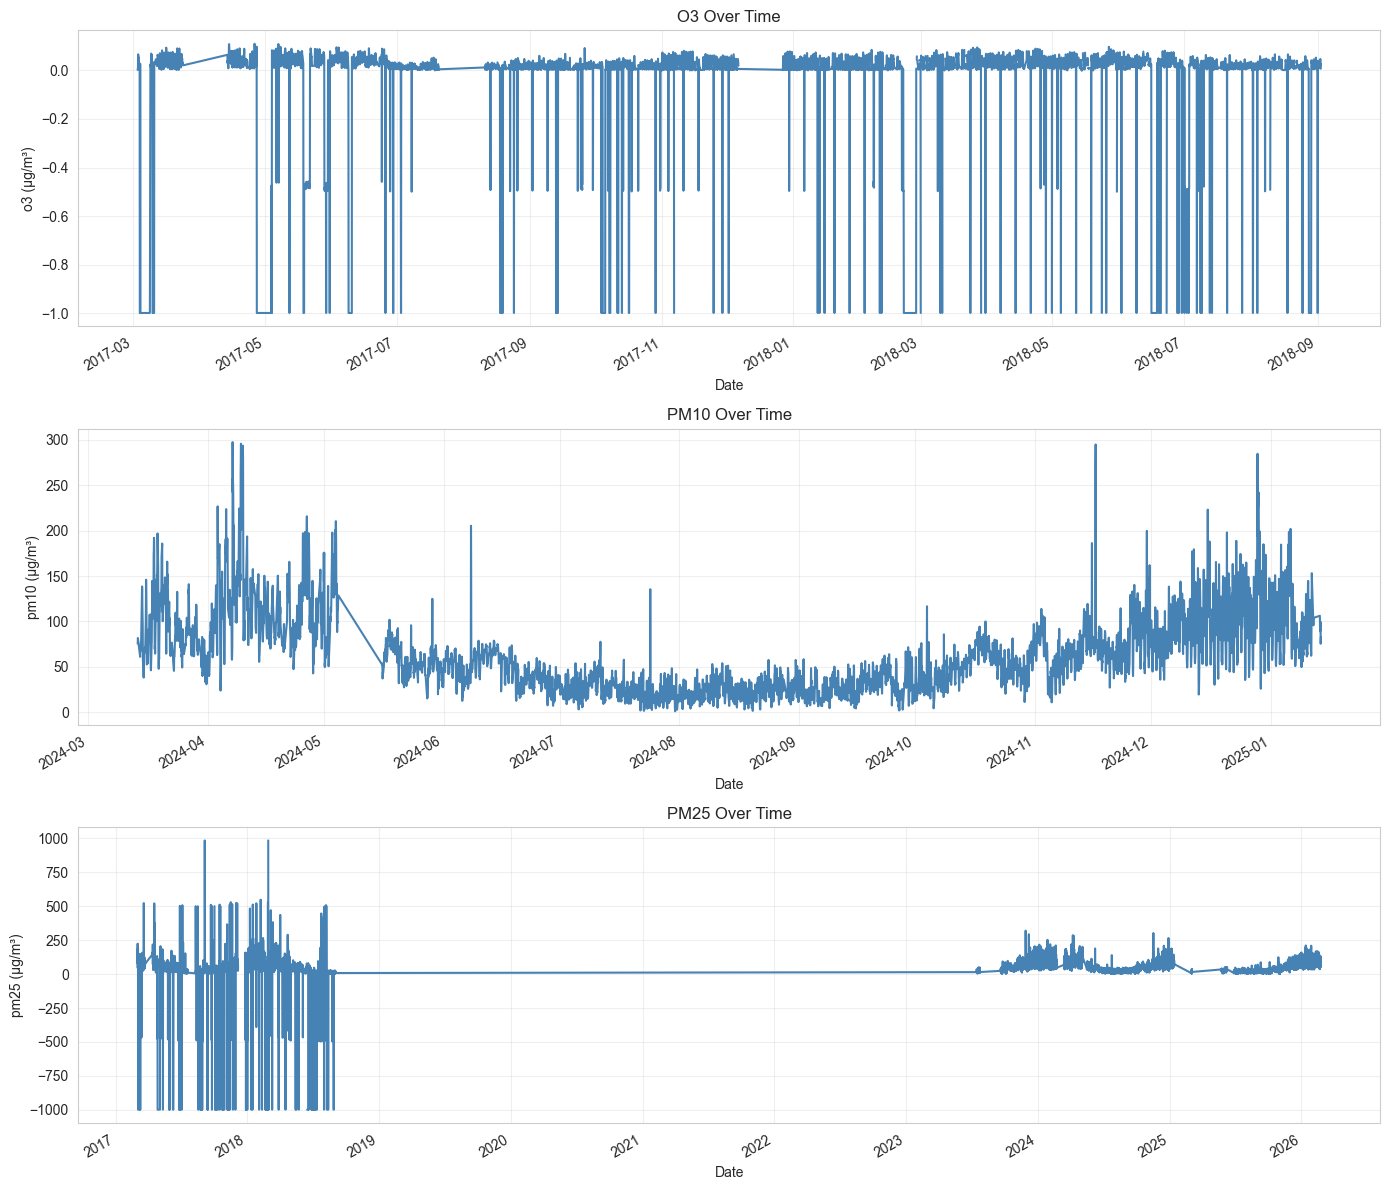

In [14]:
fig, axes = plt.subplots(len(df_pivot.columns), 1, figsize=(14, 4*len(df_pivot.columns)))

if len(df_pivot.columns) == 1:
    axes = [axes]

for idx, param in enumerate(df_pivot.columns):
    df_pivot[param].plot(ax=axes[idx], title=f'{param.upper()} Over Time', color='steelblue')
    axes[idx].set_ylabel(f'{param} (µg/m³)')
    axes[idx].set_xlabel('Date')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

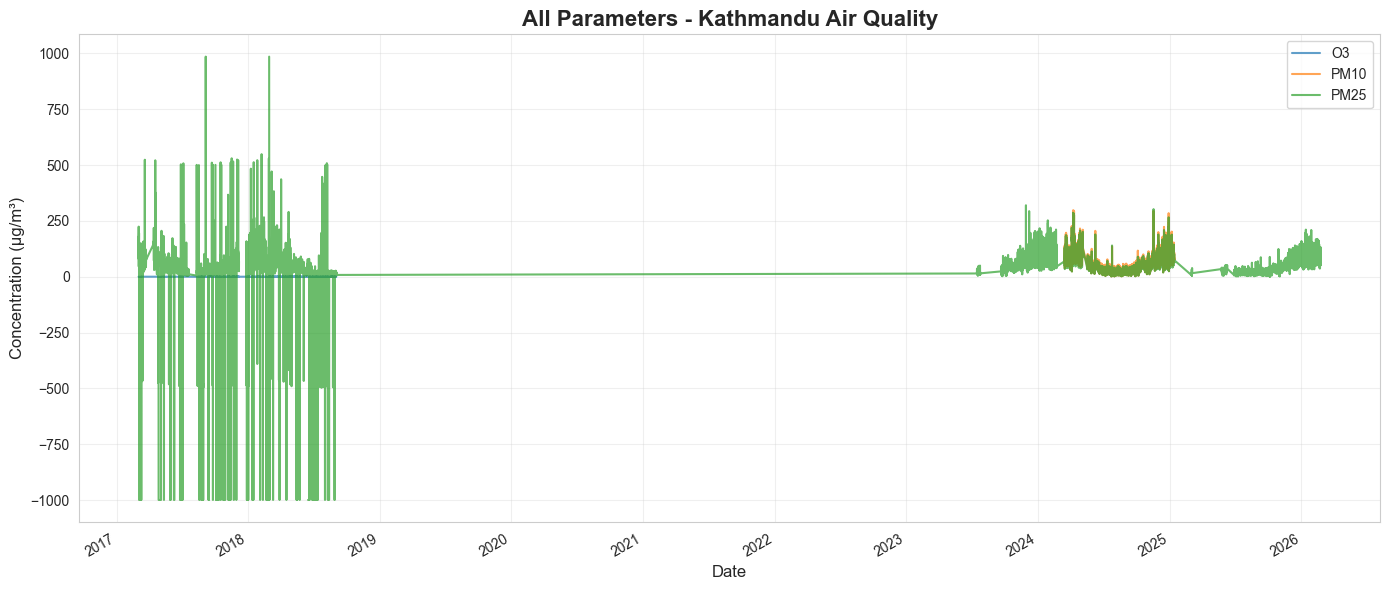

In [15]:
fig, ax = plt.subplots(figsize=(14, 6))

for param in df_pivot.columns:
    df_pivot[param].plot(ax=ax, label=param.upper(), alpha=0.7)

ax.set_title('All Parameters - Kathmandu Air Quality', fontsize=16, fontweight='bold')
ax.set_ylabel('Concentration (µg/m³)', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Daily Averages

In [16]:
df_daily = df_pivot.resample('D').mean()

print(f"Daily averaged data shape: {df_daily.shape}")

df_daily.head(10)

Daily averaged data shape: (3281, 3)


parameter,o3,pm10,pm25
datetime,,,
2017-03-02 00:00:00+00:00,0.003000,NaN,92.100000
2017-03-03 00:00:00+00:00,-0.058521,NaN,24.054167
2017-03-04 00:00:00+00:00,-0.956229,NaN,-949.252083
2017-03-05 00:00:00+00:00,-0.999000,NaN,-999.000000
2017-03-06 00:00:00+00:00,-0.999000,NaN,-999.000000
2017-03-07 00:00:00+00:00,-0.999000,NaN,-999.000000
2017-03-08 00:00:00+00:00,-0.794550,NaN,-776.757500
2017-03-09 00:00:00+00:00,-0.130062,NaN,-141.235417
2017-03-10 00:00:00+00:00,-0.613375,NaN,-615.425000


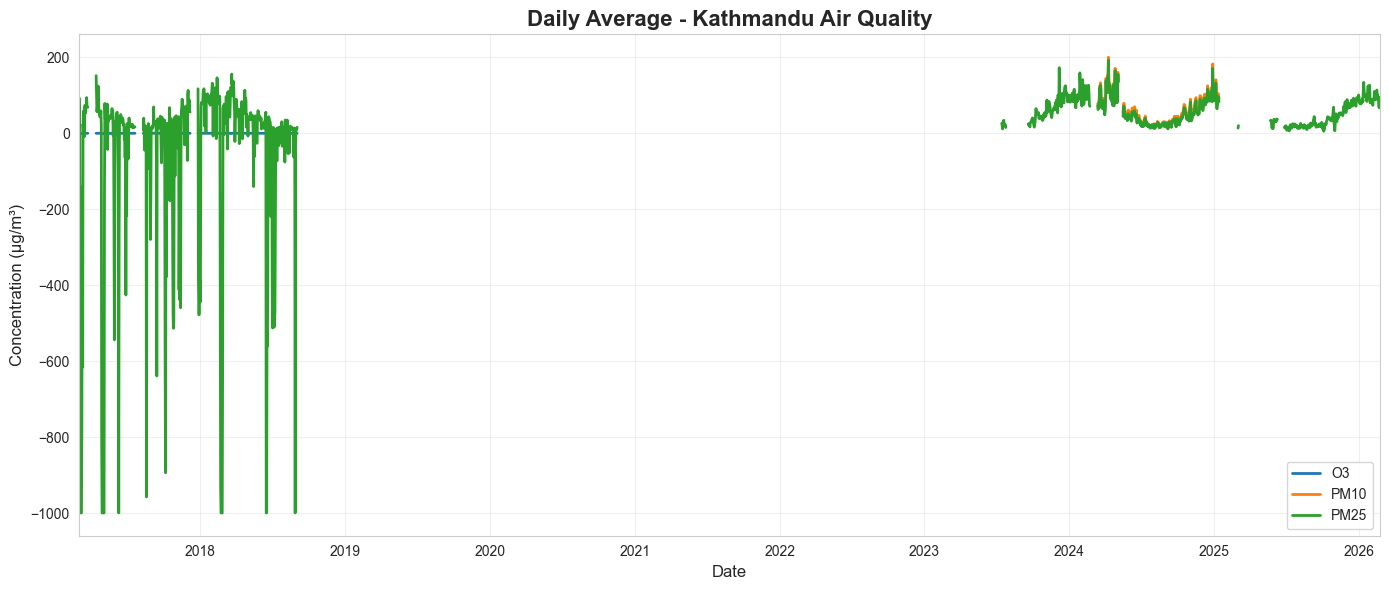

In [17]:
fig, ax = plt.subplots(figsize=(14, 6))

for param in df_daily.columns:
    df_daily[param].plot(ax=ax, label=param.upper(), linewidth=2)

ax.set_title('Daily Average - Kathmandu Air Quality', fontsize=16, fontweight='bold')
ax.set_ylabel('Concentration (µg/m³)', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.legend(loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Distribution Analysis

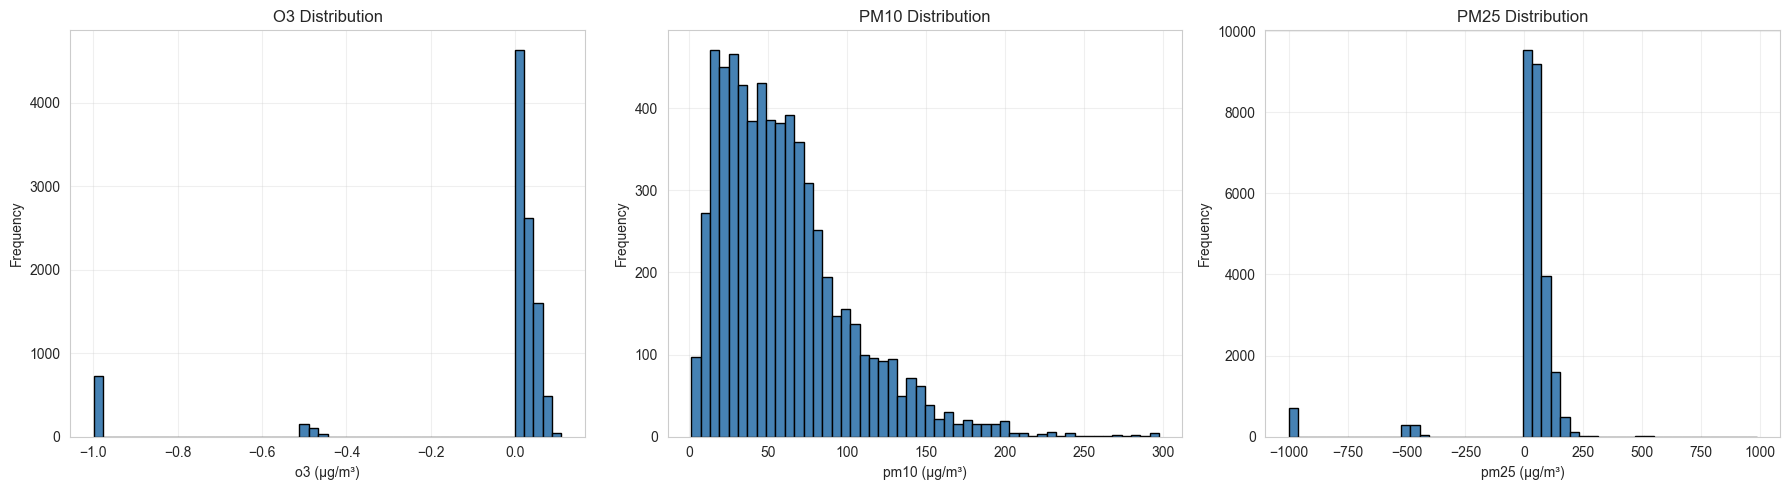

In [18]:
fig, axes = plt.subplots(1, len(df_pivot.columns), figsize=(6*len(df_pivot.columns), 5))

if len(df_pivot.columns) == 1:
    axes = [axes]

for idx, param in enumerate(df_pivot.columns):
    df_pivot[param].hist(ax=axes[idx], bins=50, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'{param.upper()} Distribution')
    axes[idx].set_xlabel(f'{param} (µg/m³)')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Locations Analysis

In [19]:
print("Data by Location:")
print(df_clean.groupby(['location_name', 'parameter']).size().unstack(fill_value=0))

Data by Location:
parameter                                        o3  pm10   pm25
location_name                                                   
Bagdol                                            0     0    376
Balaju (SC-26)- GD Labs                           0     0   1324
Balkumari(SC-28)- GD Labs                         0     0   1372
Baluwatar (SC-02) - GD Labs                       0     0   2285
CEN-SR-02: Farsidol Brick Factories               0     0   2136
CEN-SR-25: Patako Chowk, Patan Durbar Square      0     0    795
Chhetrapati (SC - 19) - GD Labs                   0     0   2207
Chovar (SC - 07) - GD Labs                        0     0   3681
Dabali, Handigaun                                 0  5210  10000
Dhathutole, Handigaun                             0  5126   8516
Embassy Kathmandu                             10000     0  10000
Gaushala Chowk (SC-01) - GD Labs                  0     0   2644
Gokarneshwor (SC-13) - GD Labs                    0     0   1837
Golfuta

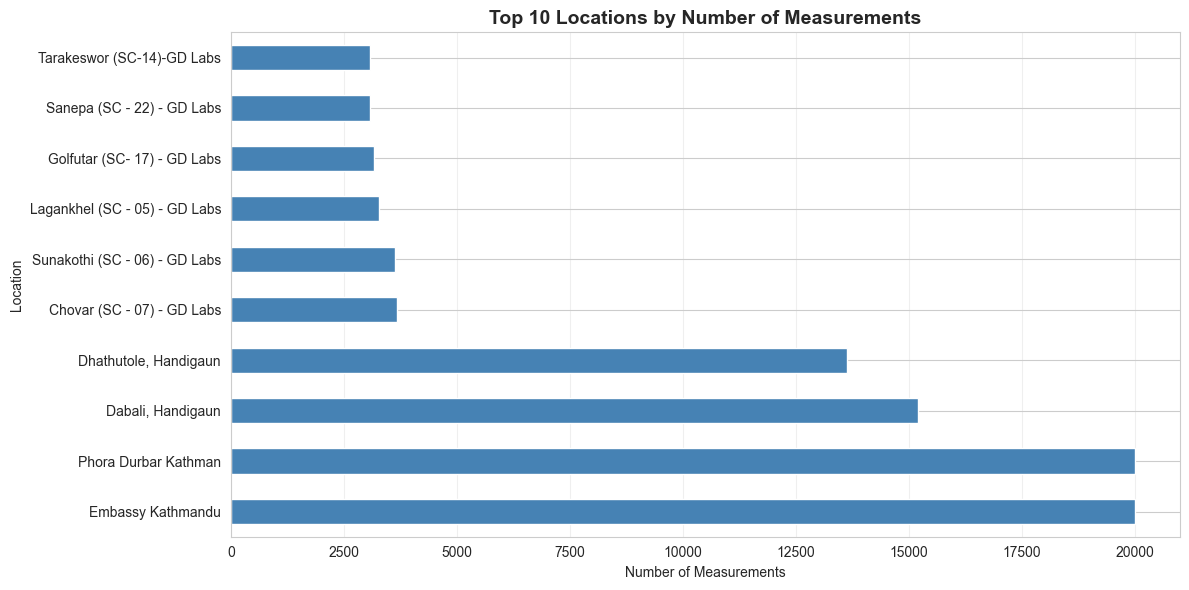

In [20]:
top_locations = df_clean['location_name'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(12, 6))
top_locations.plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Top 10 Locations by Number of Measurements', fontsize=14, fontweight='bold')
ax.set_xlabel('Number of Measurements')
ax.set_ylabel('Location')
ax.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

## 10. Save Processed Data

In [21]:
df_pivot.to_csv('data/processed/final_timeseries_data.csv')
df_daily.to_csv('data/processed/daily_averages.csv')

print("✅ Processed data saved!")
print("   📄 data/processed/final_timeseries_data.csv")
print("   📄 data/processed/daily_averages.csv")

✅ Processed data saved!
   📄 data/processed/final_timeseries_data.csv
   📄 data/processed/daily_averages.csv
